In [ ]:
import pandas as pd
import numpy as np
df  = pd.read_csv("/content/dataset.csv")
df.head()

VIN (1-10)     County      City State  Postal Code  Model Year       Make  \
0  JTMEB3FV6N     Monroe  Key West    FL        33040        2022     TOYOTA   
1  1G1RD6E45D      Clark  Laughlin    NV        89029        2013  CHEVROLET   
2  JN1AZ0CP8B     Yakima    Yakima    WA        98901        2011     NISSAN   
3  1G1FW6S08H     Skagit  Concrete    WA        98237        2017  CHEVROLET   
4  3FA6P0SU1K  Snohomish   Everett    WA        98201        2019       FORD   

        Model                   Electric Vehicle Type  \
0  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
1        VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
2        LEAF          Battery Electric Vehicle (BEV)   
3     BOLT EV          Battery Electric Vehicle (BEV)   
4      FUSION  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible            42.0   
1           Clean Alternative Fuel Vehicle Eligible            38.0   
2           Clean Alternative Fuel Vehicle Eligible            73.0   
3           Clean Alternative Fuel Vehicle Eligible           238.0   
4             Not eligible due to low battery range            26.0   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0        0.0                   NaN     198968248.0   
1        0.0                   NaN       5204412.0   
2        0.0                  15.0     218972519.0   
3        0.0                  39.0     186750406.0   
4        0.0                  38.0       2006714.0   

              Vehicle Location        Electric Utility  2020 Census Tract  
0    POINT (-81.80023 24.5545)                     NaN       1.208797e+10  
1  POINT (-114.57245 35.16815)                     NaN       3.200301e+10  
2  POINT (-120.50721 46.60448)              PACIFICORP       5.307700e+10  
3   POINT (-121.7515 48.53892)  PUGET SOUND ENERGY INC       5.305795e+10  
4  POINT (-122.20596 47.97659)  PUGET SOUND ENERGY INC       5.306104e+10

In [ ]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [ ]:
#rename VIN (1-10) to VIN
df.rename(columns={'VIN (1-10)':'VIN'},inplace=True)
df.columns = df.columns.str.replace(' ', '_')
df.columns


Index(['VIN', 'County', 'City', 'State', 'Postal_Code', 'Model_Year', 'Make',
       'Model', 'Electric_Vehicle_Type',
       'Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility', 'Electric_Range',
       'Base_MSRP', 'Legislative_District', 'DOL_Vehicle_ID',
       'Vehicle_Location', 'Electric_Utility', '2020_Census_Tract'],
      dtype='object')

In [ ]:
df.dtypes

VIN                                                   object
County                                                object
City                                                  object
State                                                 object
Postal_Code                                            int64
Model_Year                                             int64
Make                                                  object
Model                                                 object
Electric_Vehicle_Type                                 object
Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility     object
Electric_Range                                       float64
Base_MSRP                                            float64
Legislative_District                                 float64
DOL_Vehicle_ID                                       float64
Vehicle_Location                                      object
Electric_Utility                                      object
2020_Census_Tract                                    float64
dtype: object

In [ ]:
df.shape

(39784, 17)

In [ ]:
df.isna().sum()

VIN                                                    0
County                                                 0
City                                                   0
State                                                  0
Postal_Code                                            0
Model_Year                                             0
Make                                                   0
Model                                                  4
Electric_Vehicle_Type                                  0
Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility      1
Electric_Range                                         1
Base_MSRP                                              1
Legislative_District                                 112
DOL_Vehicle_ID                                         1
Vehicle_Location                                       6
Electric_Utility                                     187
2020_Census_Tract                                      1
dtype: int64

In [ ]:
len(df)

39784

In [ ]:
def formatt(x):
    return '{:.2f}%'.format(x)

((df.isnull().sum()/len(df))*100).apply(formatt)

VIN                                                  0.00%
County                                               0.00%
City                                                 0.00%
State                                                0.00%
Postal_Code                                          0.00%
Model_Year                                           0.00%
Make                                                 0.00%
Model                                                0.01%
Electric_Vehicle_Type                                0.00%
Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility    0.00%
Electric_Range                                       0.00%
Base_MSRP                                            0.00%
Legislative_District                                 0.28%
DOL_Vehicle_ID                                       0.00%
Vehicle_Location                                     0.02%
Electric_Utility                                     0.47%
2020_Census_Tract                                    0.00%
dtype: object

In [ ]:
# Remove rows with missing values
df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39590 entries, 2 to 39782
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN                                                39590 non-null  object 
 1   County                                             39590 non-null  object 
 2   City                                               39590 non-null  object 
 3   State                                              39590 non-null  object 
 4   Postal_Code                                        39590 non-null  int64  
 5   Model_Year                                         39590 non-null  int64  
 6   Make                                               39590 non-null  object 
 7   Model                                              39590 non-null  object 
 8   Electric_Vehicle_Type                              39590 non-null  object 
 9   Clean_Alter

## Univariate Analysis - Statistical Non Visual Analysis

In [ ]:
discrete_df = df.select_dtypes(include=['object'])

numerical_df = df.select_dtypes(include=['int64', 'float64'])

In [ ]:
def discrete_univariate_analysis(discrete_data):
    for col_name in discrete_data:
        print("*"*10, col_name, "*"*10)
        print(discrete_data[col_name].agg(['count', 'nunique', 'unique']))
        print('Value Counts: \n', discrete_data[col_name].value_counts())
        print()

In [ ]:
discrete_univariate_analysis(discrete_df)

********** VIN **********
count                                                  39590
nunique                                                 5809
unique     [JN1AZ0CP8B, 1G1FW6S08H, 3FA6P0SU1K, 5YJ3E1EB5...
Name: VIN, dtype: object
Value Counts: 
 VIN
5YJYGDEE9M    175
5YJYGDEEXM    168
5YJYGDEE0M    166
5YJYGDEE2M    158
5YJYGDEE5M    156
             ... 
KMUKEDTB6P      1
KM8KMDAF2P      1
YSMET3KA6P      1
1FTVW1EL2N      1
1G1RB6E45F      1
Name: count, Length: 5809, dtype: int64

********** County **********
count                                                  39590
nunique                                                   39
unique     [Yakima, Skagit, Snohomish, Island, Thurston, ...
Name: County, dtype: object
Value Counts: 
 County
King            20767
Snohomish        4261
Pierce           2966
Clark            2347
Thurston         1600
Kitsap           1453
Whatcom          1028
Spokane           967
Benton            518
Island            465
Skagit            410
Sa

In [ ]:
def numerical_univariate_analysis(numerical_data):
    for col_name in numerical_data:
        print("*"*10, col_name, "*"*10)
        print(numerical_data[col_name].agg(['min', 'max', 'mean', 'median', 'std', 'skew', 'kurtosis']))

In [ ]:
numerical_univariate_analysis(numerical_df)

********** Postal_Code **********
min         98001.000000
max         99403.000000
mean        98261.199545
median      98119.000000
std           304.360582
skew            1.829934
kurtosis        3.134225
Name: Postal_Code, dtype: float64
********** Model_Year **********
min         1997.000000
max         2023.000000
mean        2018.995782
median      2020.000000
std            2.875433
skew          -0.795689
kurtosis      -0.104179
Name: Model_Year, dtype: float64
********** Electric_Range **********
min           0.000000
max         337.000000
mean         88.830892
median       33.000000
std         102.662311
skew          0.794230
kurtosis     -0.918768
Name: Electric_Range, dtype: float64
********** Base_MSRP **********
min              0.000000
max         184400.000000
mean          1736.209396
median           0.000000
std          10435.327639
skew             6.625611
kurtosis        49.992633
Name: Base_MSRP, dtype: float64
********** Legislative_District **********

In [ ]:
numerical_df.columns

Index(['Postal_Code', 'Model_Year', 'Electric_Range', 'Base_MSRP',
       'Legislative_District', 'DOL_Vehicle_ID', '2020_Census_Tract'],
      dtype='object')

In [ ]:
discrete_df.columns

Index(['VIN', 'County', 'City', 'State', 'Make', 'Model',
       'Electric_Vehicle_Type',
       'Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility', 'Vehicle_Location',
       'Electric_Utility'],
      dtype='object')

In [ ]:
numerical_df = numerical_df.drop(columns=['DOL_Vehicle_ID'], axis=1)

print('Shape:', numerical_df.shape)
print('Columns:', list(numerical_df.columns))

Shape: (39590, 6)
Columns: ['Postal_Code', 'Model_Year', 'Electric_Range', 'Base_MSRP', 'Legislative_District', '2020_Census_Tract']


## Univariate - Visual Analysis

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

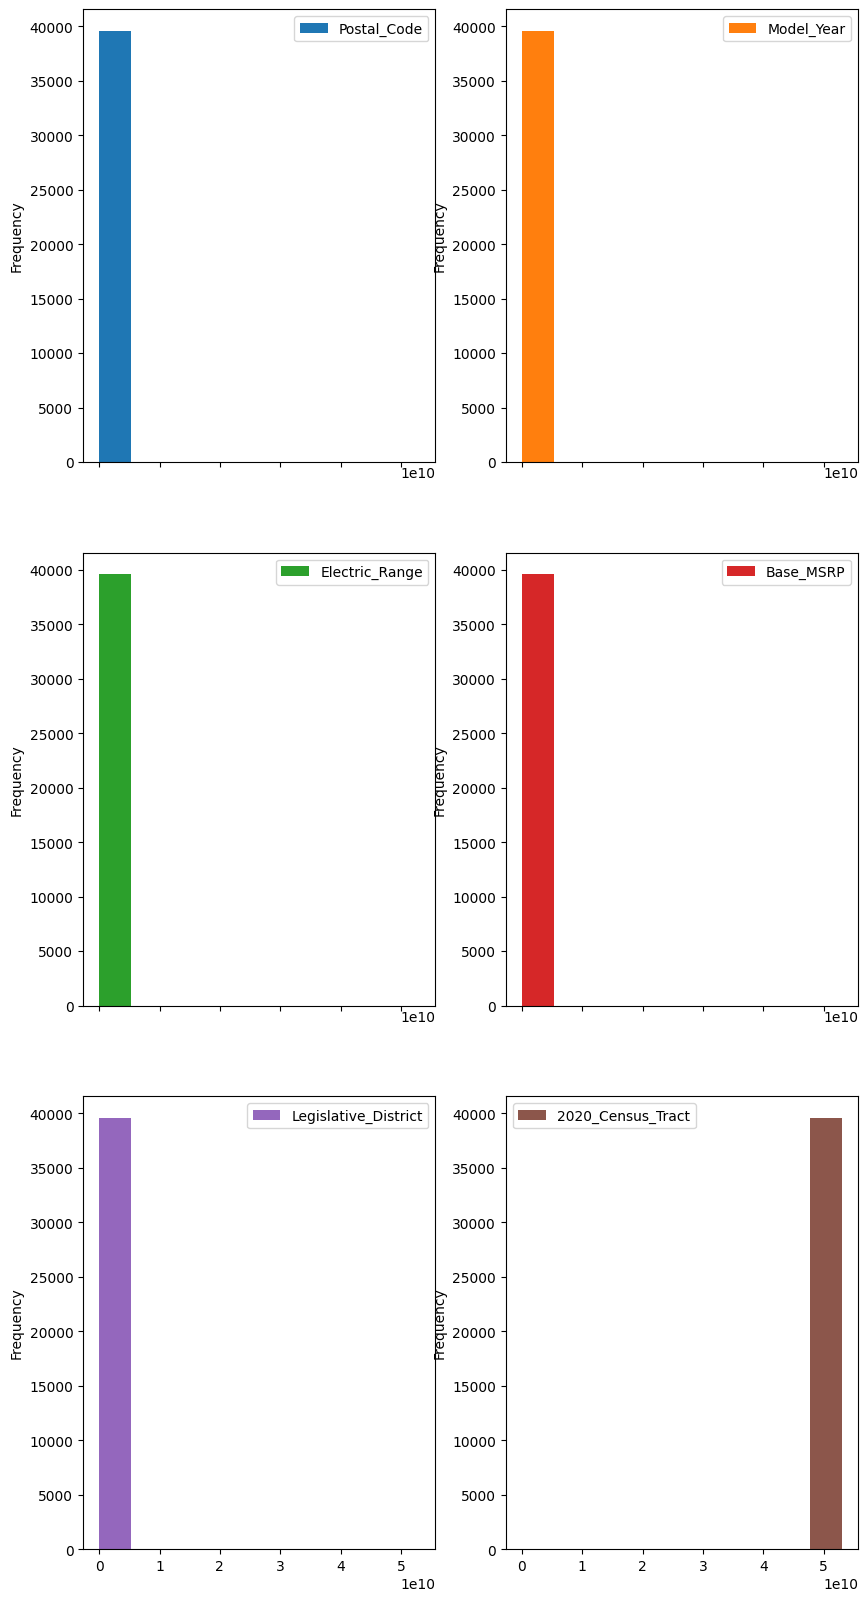

In [ ]:
numerical_df.plot(kind='hist', subplots=True, layout=(3, 2), figsize=(10, 20))

Postal_Code                Axes(0.125,0.653529;0.352273x0.226471)
Model_Year              Axes(0.547727,0.653529;0.352273x0.226471)
Electric_Range             Axes(0.125,0.381765;0.352273x0.226471)
Base_MSRP               Axes(0.547727,0.381765;0.352273x0.226471)
Legislative_District           Axes(0.125,0.11;0.352273x0.226471)
2020_Census_Tract           Axes(0.547727,0.11;0.352273x0.226471)
dtype: object

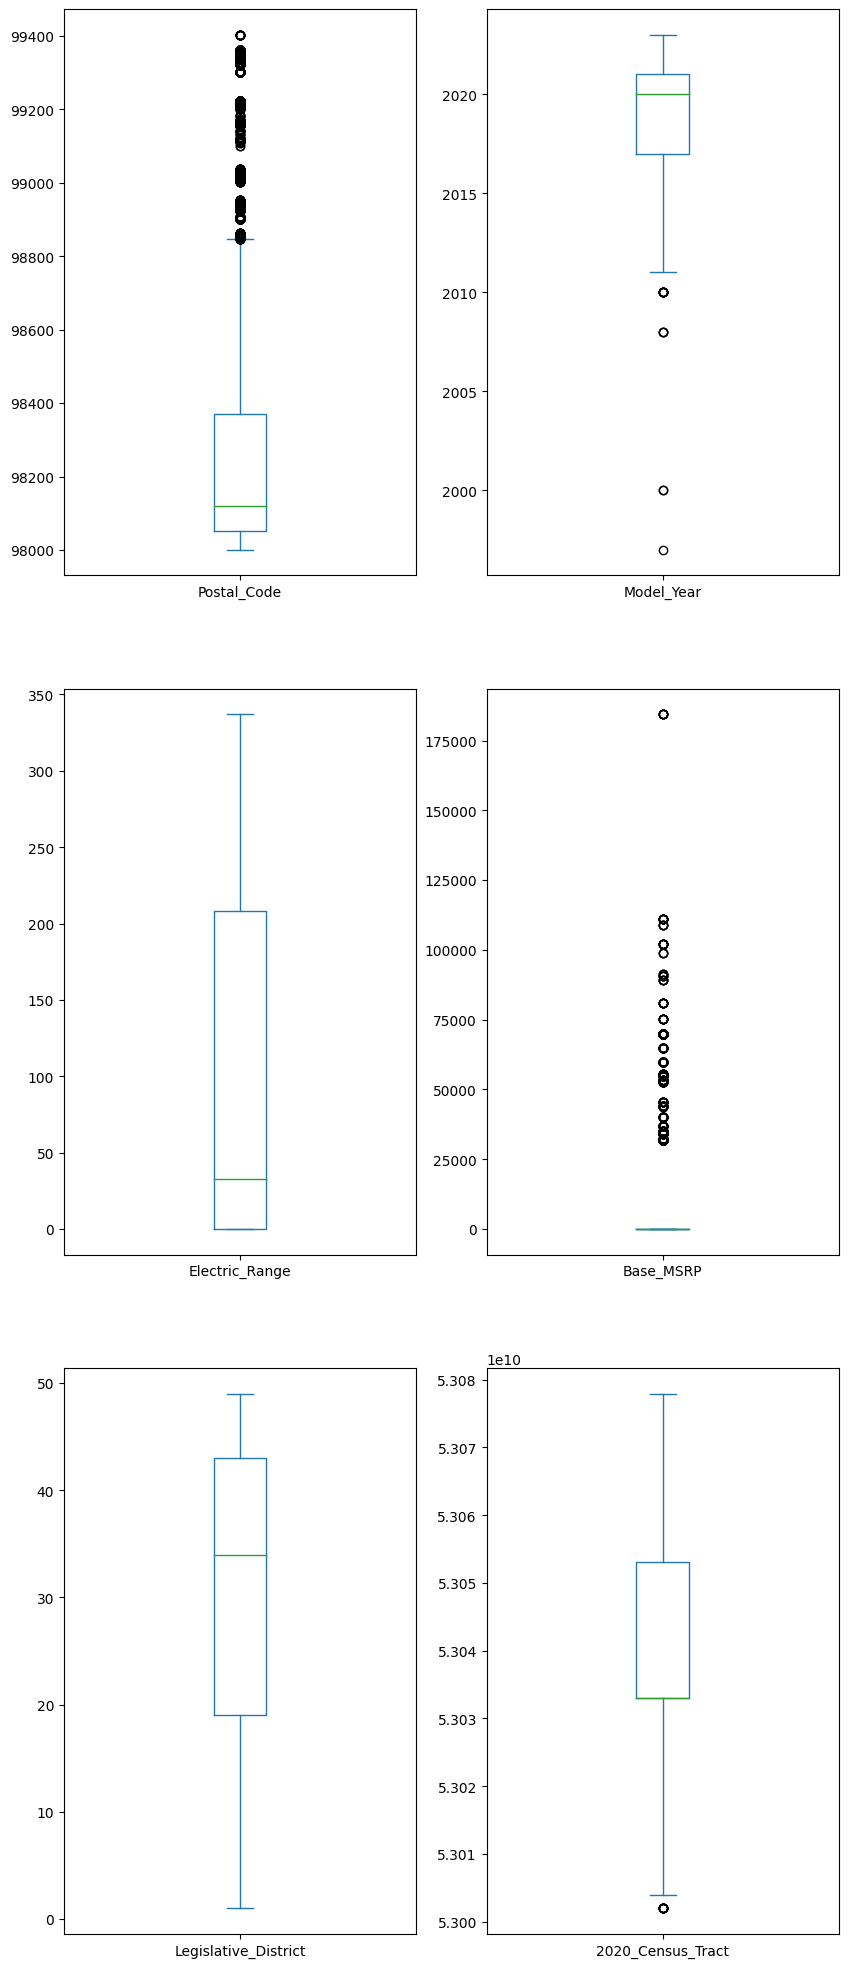

In [ ]:
numerical_df.plot(kind='box', subplots=True, layout=(3, 2), figsize=(10, 25))

In [ ]:
discrete_df.columns

Index(['VIN', 'County', 'City', 'State', 'Make', 'Model',
       'Electric_Vehicle_Type',
       'Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility', 'Vehicle_Location',
       'Electric_Utility'],
      dtype='object')

<Axes: title={'center': 'Electric_Vehicle_Type'}, xlabel='Electric_Vehicle_Type'>

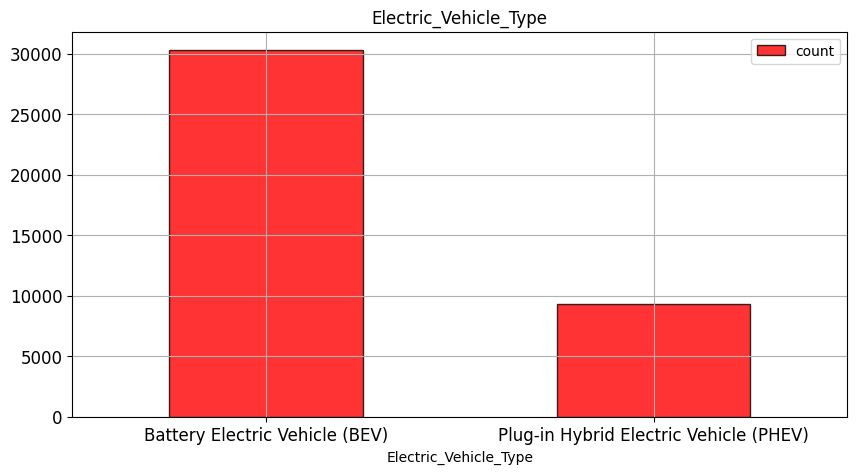

In [ ]:
df['Electric_Vehicle_Type'].value_counts().plot(kind='bar', figsize=(10, 5), color='red', edgecolor='black', rot=360, fontsize=12, title='Electric_Vehicle_Type', legend=True, grid=True, alpha=0.8, align='center')

**76.40% of the electric vehicles are Battery Electric Vehicles (BEV), and about 23.60% are Plug-in Hybrid Electric Vehicles (PHEV).**

<Axes: title={'center': 'Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility'}, xlabel='Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility'>

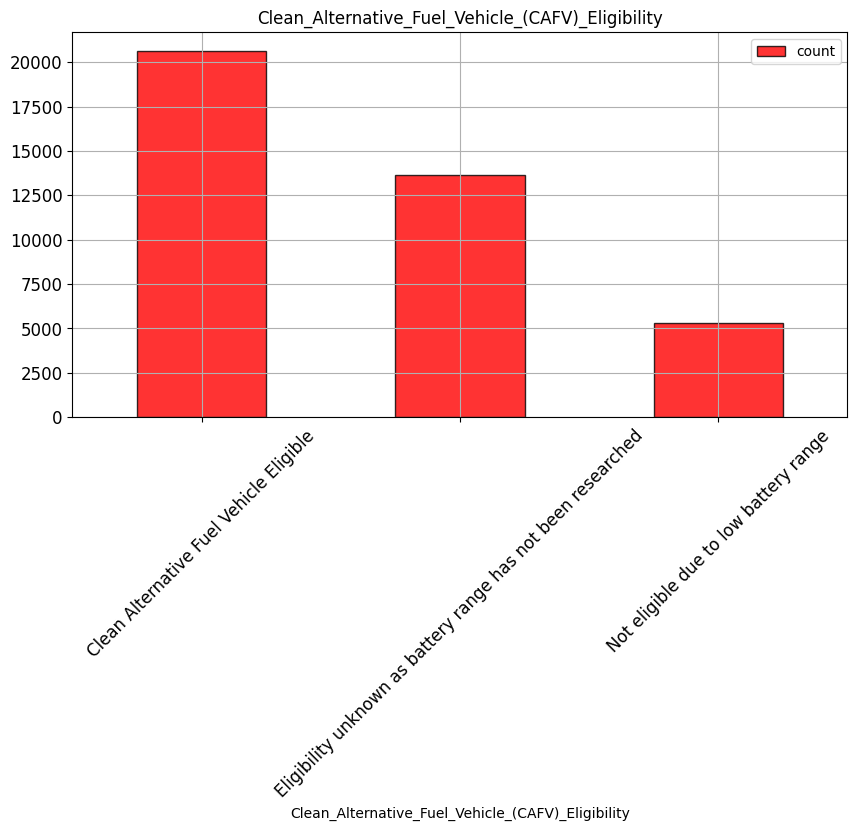

In [ ]:
df['Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility'].value_counts().plot(kind='bar', figsize=(10, 5), color='red', edgecolor='black', rot=45, fontsize=12, title='Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility', legend=True, grid=True, alpha=0.8, align='center')

**Approximately 52.00% of vehicles are classified as Clean Alternative Fuel Vehicle Eligible, 34.87% have Eligibility unknown as battery range has not been researched and 13.05% are Not eligible due to low battery range**

<Axes: title={'center': 'County'}, xlabel='County'>

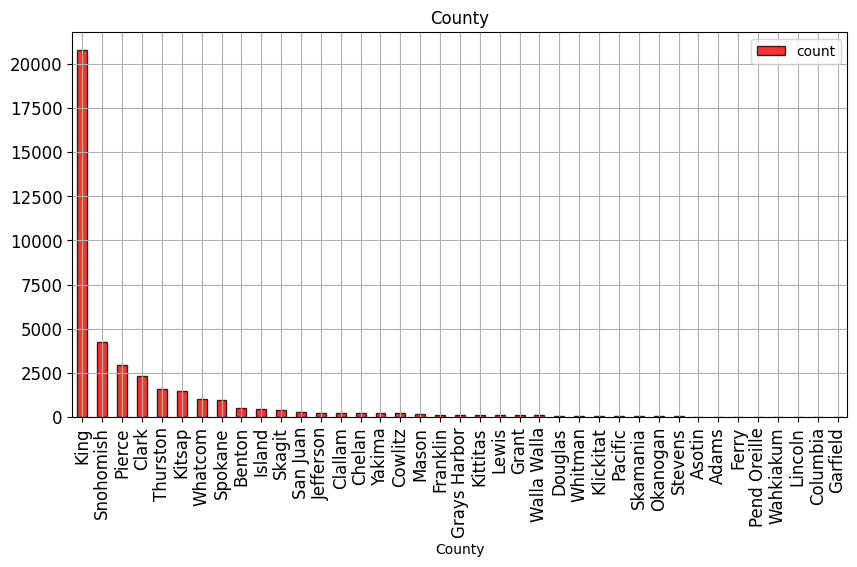

In [ ]:
df['County'].value_counts().plot(kind='bar', figsize=(10, 5), color='red', edgecolor='black', rot=90, fontsize=12, title='County', legend=True, grid=True, alpha=0.8, align='center')

**Approximately 52.57% of vehicles are registered in King County, 11.06% in Snohomish County, 7.59% in Pierce County, 5.95% in Clark County, 3.66% in Thurston County, 3.41% in Kitsap County, and 2.53% in Whatcom County.**

<Axes: title={'center': 'Make'}, xlabel='Make'>

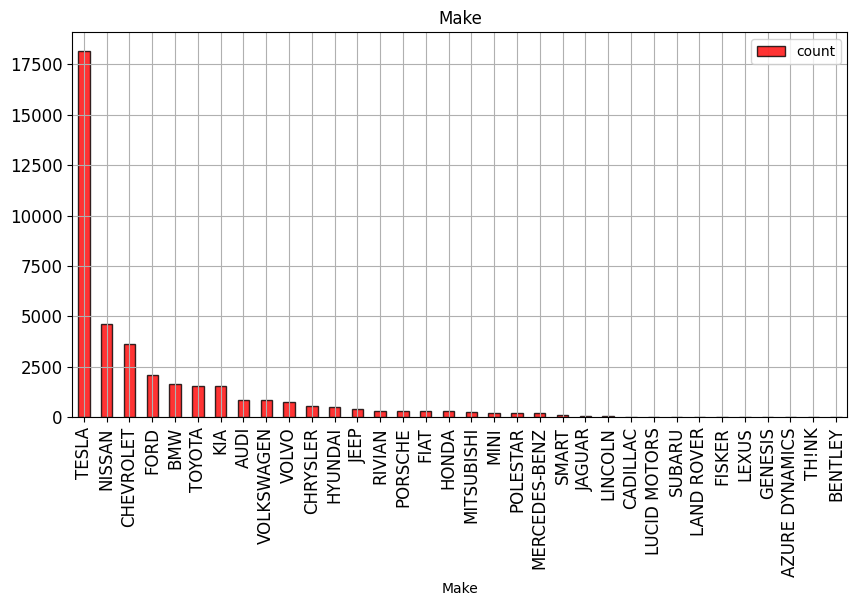

In [ ]:
df['Make'].value_counts().plot(kind='bar', figsize=(10, 5), color='red', edgecolor='black', rot=90, fontsize=12, title='Make', legend=True, grid=True, alpha=0.8, align='center')

**Approximately 46.29% of vehicles are TESLA (51,883), 11.46% are NISSAN (12,846), 9.03% are CHEVROLET (10,140), 5.15% are FORD (5,780), 4.16% are BMW (4,660), 3.98% are KIA (4,469), 3.89% are TOYOTA (4,368), 2.23% are VOLKSWAGEN (2,507), 2.07% are AUDI (2,320), and 2.01% are VOLVO (2,256).**

### Insights on Univariate Analysis
The dataset contains 39,590 entries.​

- Battery Electric Vehicles (BEVs) make up a large majority about 76.5% of the electric vehicles in this dataset, with 30,297 BEVs compared to 9,293 Plug-in Hybrid Electric Vehicles (PHEVs). This shows a clear preference for fully electric vehicles over hybrids.​

- There are 5,809 unique VINs out of a total of 39,590 vehicles. This indicates that multiple vehicles share the same VIN, which typically points to a specific model or production batch are either popular or produced in larger quantities.

- Out of 39,590 vehicles, 20,656 are eligible for Clean Alternative Fuel Vehicle status, while 13,656 have unknown eligibility due to unresearched battery ranges, and 5,278 are ineligible due to low battery range.

- King County accounts for approximately 52.5% of the total vehicles in the dataset, while Snohomish represents about 10.8%, and Pierce makes up around 7.5%. Other counties have smaller shares, with Clark at about 5.9%, Thurston at 4%, Kitsap at 3.7%, Whatcom at 2.6%, Spokane at 2.4%, Benton at 1.3%, and Island at 1.2%.

- Seattle accounts for approximately 19.1% of the total vehicles in the dataset this indicates it is a major hub for vehicle ownership, likely due to its size and urban infrastructure, while Bellevue makes up about 5.1%, Redmond represents around 3.7%, Vancouver contributes about 3.5%, and Kirkland holds approximately 3.4%.

- Tesla accounts for approximately 45.9% of the total vehicles in the dataset, followed by Nissan at about 11.6% and Chevrolet at around 9.2%, while other brands like Ford, BMW, and Toyota each make up between 4% and 5.2% of the total.

- Puget Sound Energy Inc. and its partnerships account for approximately 54.8% of the total electric utility services in the dataset, with 13,722 vehicles served through its collaboration with the City of Tacoma and 7,967 vehicles directly from Puget Sound Energy, while other utilities like Bonneville Power Administration also play notable roles.


## Bivariate Analysis - Non Visual

In [ ]:
df.columns

Index(['VIN', 'County', 'City', 'State', 'Postal_Code', 'Model_Year', 'Make',
       'Model', 'Electric_Vehicle_Type',
       'Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility', 'Electric_Range',
       'Base_MSRP', 'Legislative_District', 'DOL_Vehicle_ID',
       'Vehicle_Location', 'Electric_Utility', '2020_Census_Tract'],
      dtype='object')

In [ ]:
df.drop(['DOL_Vehicle_ID'], axis=1, inplace=True)
df.columns

Index(['VIN', 'County', 'City', 'State', 'Postal_Code', 'Model_Year', 'Make',
       'Model', 'Electric_Vehicle_Type',
       'Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility', 'Electric_Range',
       'Base_MSRP', 'Legislative_District', 'Vehicle_Location',
       'Electric_Utility', '2020_Census_Tract'],
      dtype='object')

In [ ]:
numerical_df.corr()

Postal_Code  Model_Year  Electric_Range  Base_MSRP  \
Postal_Code              1.000000   -0.048408       -0.033937  -0.005488   
Model_Year              -0.048408    1.000000       -0.287685  -0.228956   
Electric_Range          -0.033937   -0.287685        1.000000   0.082413   
Base_MSRP               -0.005488   -0.228956        0.082413   1.000000   
Legislative_District    -0.442669    0.007884        0.026672   0.006485   
2020_Census_Tract        0.019850   -0.028782       -0.009366  -0.004406   

                      Legislative_District  2020_Census_Tract  
Postal_Code                      -0.442669           0.019850  
Model_Year                        0.007884          -0.028782  
Electric_Range                    0.026672          -0.009366  
Base_MSRP                         0.006485          -0.004406  
Legislative_District              1.000000          -0.104075  
2020_Census_Tract                -0.104075           1.000000

In [ ]:
numerical_df.columns

Index(['Postal_Code', 'Model_Year', 'Electric_Range', 'Base_MSRP',
       'Legislative_District', '2020_Census_Tract'],
      dtype='object')

<Axes: xlabel='Model_Year', ylabel='Electric_Range'>

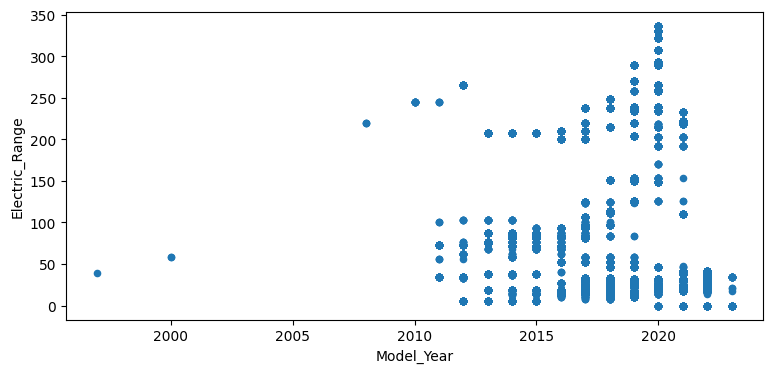

In [ ]:
df.plot(kind='scatter', x='Model_Year', y='Electric_Range', figsize=(9, 4))

<Axes: xlabel='Postal_Code', ylabel='Legislative_District'>

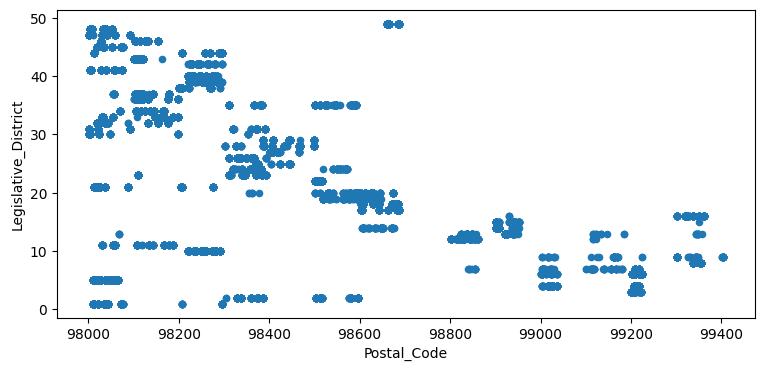

In [ ]:
df.plot(kind='scatter', x='Postal_Code', y='Legislative_District', figsize=(9, 4))

<Axes: xlabel='2020_Census_Tract', ylabel='Legislative_District'>

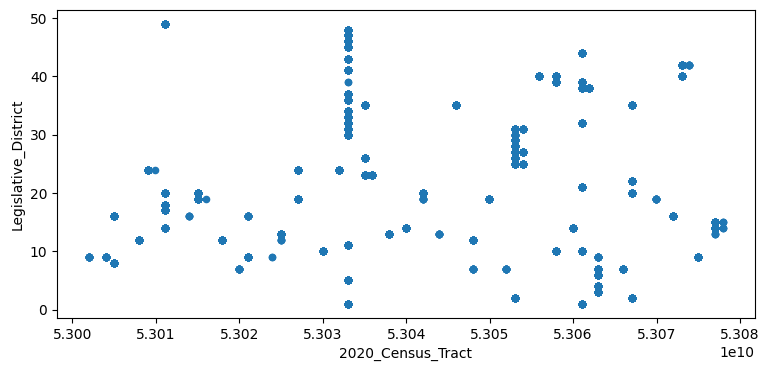

In [ ]:
df.plot(kind='scatter', x='2020_Census_Tract', y='Legislative_District', figsize=(9, 4))

## (II) Discrete vs Discrete Data

In [ ]:
pd.crosstab(df['Make'], df['Electric_Vehicle_Type'])

Electric_Vehicle_Type  Battery Electric Vehicle (BEV)  \
Make                                                    
AUDI                                              424   
AZURE DYNAMICS                                      4   
BENTLEY                                             0   
BMW                                               329   
CADILLAC                                            0   
CHEVROLET                                        1968   
CHRYSLER                                            0   
FIAT                                              287   
FISKER                                              0   
FORD                                              743   
GENESIS                                             4   
HONDA                                               0   
HYUNDAI                                           402   
JAGUAR                                             81   
JEEP                                                0   
KIA                                              1121   
LAND ROVER                                          0   
LEXUS                                               0   
LINCOLN                                             0   
LUCID MOTORS                                       27   
MERCEDES-BENZ                                      94   
MINI                                              155   
MITSUBISHI                                         24   
NISSAN                                           4604   
POLESTAR                                          201   
PORSCHE                                           143   
RIVIAN                                            322   
SMART                                              90   
SUBARU                                              1   
TESLA                                           18178   
TH!NK                                               3   
TOYOTA                                             27   
VOLKSWAGEN                                        855   
VOLVO                                             210   

Electric_Vehicle_Type  Plug-in Hybrid Electric Vehicle (PHEV)  
Make                                                           
AUDI                                                      443  
AZURE DYNAMICS                                              0  
BENTLEY                                                     1  
BMW                                                      1313  
CADILLAC                                                   32  
CHEVROLET                                                1681  
CHRYSLER                                                  538  
FIAT                                                        0  
FISKER                                                     11  
FORD                                                     1338  
GENESIS                                                     0  
HONDA                                                     287  
HYUNDAI                                                   106  
JAGUAR                                                      0  
JEEP                                                      403  
KIA                                                       414  
LAND ROVER                                                 13  
LEXUS                                                       9  
LINCOLN                                                    57  
LUCID MOTORS                                                0  
MERCEDES-BENZ                                              93  
MINI                                                       69  
MITSUBISHI                                                216  
NISSAN                                                      0  
POLESTAR                                                    0  
PORSCHE                                                   156  
RIVIAN                                                      0  
SMART                                                       0  
SUBARU                     

In [ ]:
pd.crosstab(df['Make'], df['Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility'])

Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility  Clean Alternative Fuel Vehicle Eligible  \
Make                                                                                         
AUDI                                                                                   219   
AZURE DYNAMICS                                                                           4   
BENTLEY                                                                                  0   
BMW                                                                                    971   
CADILLAC                                                                                32   
CHEVROLET                                                                             3113   
CHRYSLER                                                                               538   
FIAT                                                                                   287   
FISKER                                                                                  11   
FORD                                                                                   169   
GENESIS                                                                                  0   
HONDA                                                                                  285   
HYUNDAI                                                                                125   
JAGUAR                                                                                  68   
JEEP                                                                                     0   
KIA                                                                                    656   
LAND ROVER                                                                               0   
LEXUS                                                                                    9   
LINCOLN                                                                                  0   
LUCID MOTORS                                                                             0   
MERCEDES-BENZ                                                                           34   
MINI                                                                                    43   
MITSUBISHI                                                                              24   
NISSAN                                                                                3994   
POLESTAR                                                                                27   
PORSCHE                                                                                 71   
RIVIAN                                                                                   0   
SMART                                                                                   90   
SUBARU                                                                                   0   
TESLA                                                                                 9056   
TH!NK                                                                                    3   
TOYOTA                                                                                 385   
VOLKSWAGEN                                                                             355   
VOLVO                                                                                   87   

Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility  Eligibility unknown as battery range has not been researched  \
Make                                                                                                              
AUDI                                                                                             205              
AZURE DYNAMICS                                                                                     0              
BENTLEY                                                                                            0              
BMW                                     

In [ ]:
pd.crosstab(df['Electric_Vehicle_Type'], df['Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility'])

Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility  Clean Alternative Fuel Vehicle Eligible  \
Electric_Vehicle_Type                                                                        
Battery Electric Vehicle (BEV)                                                       16636   
Plug-in Hybrid Electric Vehicle (PHEV)                                                4020   

Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility  Eligibility unknown as battery range has not been researched  \
Electric_Vehicle_Type                                                                                             
Battery Electric Vehicle (BEV)                                                                 13656              
Plug-in Hybrid Electric Vehicle (PHEV)                                                             0              

Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility  Not eligible due to low battery range  
Electric_Vehicle_Type                                                                     
Battery Electric Vehicle (BEV)                                                         5  
Plug-in Hybrid Electric Vehicle (PHEV)                                              5273

In [ ]:
pd.crosstab(df['County'], df['Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility'])

Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility  Clean Alternative Fuel Vehicle Eligible  \
County                                                                                       
Adams                                                                                    8   
Asotin                                                                                  10   
Benton                                                                                 285   
Chelan                                                                                 144   
Clallam                                                                                130   
Clark                                                                                 1178   
Columbia                                                                                 1   
Cowlitz                                                                                105   
Douglas                                                                                 49   
Ferry                                                                                    8   
Franklin                                                                                75   
Garfield                                                                                 1   
Grant                                                                                   59   
Grays Harbor                                                                            67   
Island                                                                                 254   
Jefferson                                                                              144   
King                                                                                 10780   
Kitsap                                                                                 801   
Kittitas                                                                                67   
Klickitat                                                                               35   
Lewis                                                                                   65   
Lincoln                                                                                  5   
Mason                                                                                  105   
Okanogan                                                                                18   
Pacific                                                                                 27   
Pend Oreille                                                                             7   
Pierce                                                                                1489   
San Juan                                                                               182   
Skagit                                                                                 213   
Skamania                                                                                20   
Snohomish                                                                             2156   
Spokane                                                                                513   
Stevens                                                                                 19   
Thurston                                                                               836   
Wahkiakum                                                                                6   
Walla Walla                                                                             59   
Whatcom                                                                                591   
Whitman                                                                                 24   
Yakima                                                                                 120   

Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility  Eligibility unknown as battery range has not been researched  \
County                        

In [ ]:
discrete_df.columns

Index(['VIN', 'County', 'City', 'State', 'Make', 'Model',
       'Electric_Vehicle_Type',
       'Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility', 'Vehicle_Location',
       'Electric_Utility'],
      dtype='object')

In [ ]:
pd.crosstab(df['County'], df['Electric_Vehicle_Type'])

Electric_Vehicle_Type  Battery Electric Vehicle (BEV)  \
County                                                  
Adams                                               9   
Asotin                                             10   
Benton                                            331   
Chelan                                            187   
Clallam                                           149   
Clark                                            1649   
Columbia                                            4   
Cowlitz                                           151   
Douglas                                            61   
Ferry                                              13   
Franklin                                          100   
Garfield                                            0   
Grant                                              74   
Grays Harbor                                       81   
Island                                            335   
Jefferson                                         173   
King                                            16665   
Kitsap                                           1031   
Kittitas                                          101   
Klickitat                                          38   
Lewis                                              83   
Lincoln                                             5   
Mason                                             128   
Okanogan                                           27   
Pacific                                            25   
Pend Oreille                                        8   
Pierce                                           2111   
San Juan                                          201   
Skagit                                            308   
Skamania                                           27   
Snohomish                                        3379   
Spokane                                           659   
Stevens                                            22   
Thurston                                         1111   
Wahkiakum                                          10   
Walla Walla                                        69   
Whatcom                                           761   
Whitman                                            43   
Yakima                                            158   

Electric_Vehicle_Type  Plug-in Hybrid Electric Vehicle (PHEV)  
County                                                         
Adams                                                       5  
Asotin                                                      9  
Benton                                                    187  
Chelan                                                     45  
Clallam                                                    86  
Clark                                                     698  
Columbia                                                    1  
Cowlitz                                                    77  
Douglas                                                    21  
Ferry                                                       1  
Franklin                                                   35  
Garfield                                                    2  
Grant                                                      35  
Grays Harbor                                               53  
Island                                                    130  
Jefferson                                                  71  
King                                                     4102  
Kitsap                                                    422  
Kittitas                                                   25  
Klickitat                                                  16  
Lewis                                                      42  
Lincoln                                                     4  
Mason                                                      64  
Okanogan                                                   15 

In [ ]:
pd.crosstab(df['County'], df['Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility'])

Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility  Clean Alternative Fuel Vehicle Eligible  \
County                                                                                       
Adams                                                                                    8   
Asotin                                                                                  10   
Benton                                                                                 285   
Chelan                                                                                 144   
Clallam                                                                                130   
Clark                                                                                 1178   
Columbia                                                                                 1   
Cowlitz                                                                                105   
Douglas                                                                                 49   
Ferry                                                                                    8   
Franklin                                                                                75   
Garfield                                                                                 1   
Grant                                                                                   59   
Grays Harbor                                                                            67   
Island                                                                                 254   
Jefferson                                                                              144   
King                                                                                 10780   
Kitsap                                                                                 801   
Kittitas                                                                                67   
Klickitat                                                                               35   
Lewis                                                                                   65   
Lincoln                                                                                  5   
Mason                                                                                  105   
Okanogan                                                                                18   
Pacific                                                                                 27   
Pend Oreille                                                                             7   
Pierce                                                                                1489   
San Juan                                                                               182   
Skagit                                                                                 213   
Skamania                                                                                20   
Snohomish                                                                             2156   
Spokane                                                                                513   
Stevens                                                                                 19   
Thurston                                                                               836   
Wahkiakum                                                                                6   
Walla Walla                                                                             59   
Whatcom                                                                                591   
Whitman                                                                                 24   
Yakima                                                                                 120   

Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility  Eligibility unknown as battery range has not been researched  \
County                        

## (III) Continuous Numerical vs Discrete Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39590 entries, 2 to 39782
Data columns (total 16 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN                                                39590 non-null  object 
 1   County                                             39590 non-null  object 
 2   City                                               39590 non-null  object 
 3   State                                              39590 non-null  object 
 4   Postal_Code                                        39590 non-null  int64  
 5   Model_Year                                         39590 non-null  int64  
 6   Make                                               39590 non-null  object 
 7   Model                                              39590 non-null  object 
 8   Electric_Vehicle_Type                              39590 non-null  object 
 9   Clean_Alter

In [ ]:
group = df.groupby('Electric_Vehicle_Type')

group['Model_Year'].agg(['min', 'max', 'mean', 'median'])

min   max         mean  median
Electric_Vehicle_Type                                                  
Battery Electric Vehicle (BEV)          1997  2023  2019.339968  2020.0
Plug-in Hybrid Electric Vehicle (PHEV)  2011  2023  2017.873668  2018.0

<Axes: title={'center': 'Model_Year'}, xlabel='Electric_Vehicle_Type'>

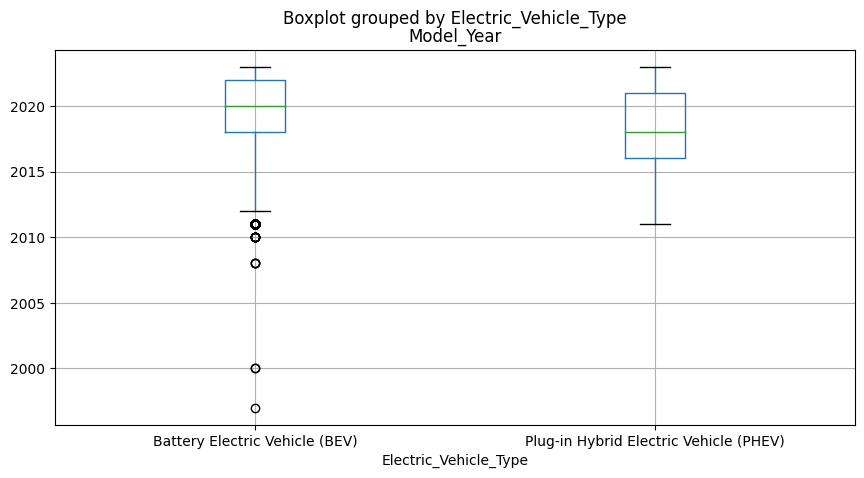

In [ ]:
df.boxplot(by='Electric_Vehicle_Type', column='Model_Year', figsize=(10, 5))

**The majority of BEVs and PHEVs are from the recent years (2015-2020), indicating a growing trend in the development and adoption of electric vehicles.​Both BEVs and PHEVs have a similar overall distribution of model years, suggesting that both types have been introduced and adopted at a similar pace.**

In [ ]:
import plotly.express as px
fig = px.scatter(df, x ='Base_MSRP', y='Model_Year' )
fig.show()

**There appears to be a general trend where newer model year cars tend to have higher base MSRPs.**
**TThere is a cluster of data points in the range 2015-2020 with base MSRPs between 50k and 100k. This suggests that this price range is particularly popular for newer model year cars.**

In [ ]:
fig = px.box(df, x ='Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility', y='Model_Year' )
fig.show()

**The majority of CAFV-eligible vehicles are from the recent years (2015-2020), indicating a growing trend in the development and adoption of cleaner vehicles.
Vehicles that are not eligible due to low battery range are also concentrated in the recent years, suggesting that battery technology has been a limiting factor for CAFV eligibility.
There is a lack of data for vehicles with unknown battery range eligibility, potentially due to limited research or data availability.**

In [ ]:
fig = px.box(df, x ='Make', y='Model_Year' )
fig.show()

**The majority of cars in the dataset have model years between 2015 and 2020, indicating a recent focus on newer models. tjere is a significant gap in model years between 2000 and 2005, suggesting a potential drop in car production or sales of electric vehicles during this period.**

In [ ]:
fig = px.pie(df, names ='Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility', values='Model_Year' )
fig.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39590 entries, 2 to 39782
Data columns (total 16 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN                                                39590 non-null  object 
 1   County                                             39590 non-null  object 
 2   City                                               39590 non-null  object 
 3   State                                              39590 non-null  object 
 4   Postal_Code                                        39590 non-null  int64  
 5   Model_Year                                         39590 non-null  int64  
 6   Make                                               39590 non-null  object 
 7   Model                                              39590 non-null  object 
 8   Electric_Vehicle_Type                              39590 non-null  object 
 9   Clean_Alter

### Animated Choropleth Plot using plotly.express

In [ ]:
# Create a choropleth map
fig = px.choropleth(
    df,
    locations = 'State',
    color = "Make",
    hover_name= "State",
    hover_data= ["Electric_Range","City","State"],
    locationmode='USA-states',
    animation_frame = "Model_Year",
    scope="usa",

)
fig.update_geos(overwrite=True)
fig.show()

### Racing bar plot

In [ ]:
!pip install -q bar_chart_race
import bar_chart_race as bcr


In [ ]:
df_grouped = df.groupby(['Model_Year', 'Make']).size().unstack(fill_value=0).cumsum()

In [ ]:
bcr.bar_chart_race(
    df=df_grouped,
    filename="racing_bar.mp4",
    n_bars=10,  # Number of bars to show
    fixed_order=False,
    fixed_max=True,
    title="Top Electric Vehicle Makes Over the Years",
    steps_per_period=10,
    period_length=500
)


/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:889: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:286: UserWarning:

FixedFormatter should only be used together with FixedLocator

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:287: UserWarning:

FixedFormatter should only be used together with FixedLocator

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:226: UserWarning:

Some of your columns never make an appearance in the animation. To reduce color repetition, set `filter_column_colors` to `True`



### Conclusion

- Tesla shows rapid growth in the automotive market with most of its models concentrated in recent years, while Toyota, Honda, and Hyundai demonstrate a consistent presence with a wide range of model years, and luxury brands like BMW, Mercedes-Benz, and Audi feature a mix of older and newer models, likely targeting both existing and new customers.​

- The Clean Alternative Fuel Vehicle Eligible category includes a wide range of model years, showing many eligible vehicles. In contrast, the Not Eligible Due to Low Battery Range category mainly includes recent models, suggesting better battery technology but still some limitations. The Eligibility Unknown category indicates a need for more research, as it has limited data points.